# Session 6: Raster Data Analysis
*Written by Men Vuthy, 2021*

---

#### 1. Reading raster file with Rasterio

[Rasterio](https://rasterio.readthedocs.io/en/latest/index.html) is a GDAL and Numpy-based Python library used for processing raster data and analysis. With Rasterio, we can read and write many different [raster formats](https://gdal.org/drivers/raster/index.html) in Python. Most common file formats include for example `TIFF` and `GeoTIFF`, `ASCII Grid` and `Erdas Imagine .img` -files.

In this section, we will use Landsat 8 image retrieved from Google Earth Engine. You can download the image via my [code snippet](https://code.earthengine.google.com/7ef1a7c389a11dd243dc814448ae3236).

Let's first import Rasterio module

In [1]:
import rasterio

In [2]:
# file path
raster_fp = 'data/landsat-8-tsl.tiff'

# open file with rasterio
raster = rasterio.open(raster_fp)

* Check the type of file we opened

In [3]:
# Check type of the variable 'raster'
type(raster)

rasterio.io.DatasetReader

We can see that our raster variable is a `rasterio._io.RasterReader` type which means that we have opened the file for reading.

**Reading file properties**

In [4]:
# Check projection
raster.crs

CRS.from_dict(init='epsg:4326')

In [5]:
# Number of bands
raster.count

6

In [6]:
# Dimensions
print(raster.width)
print(raster.height)

6912
5008


In [7]:
# Affine transform (how raster is scaled, rotated, skewed, and/or translated)
raster.transform

Affine(0.00026949458523585647, 0.0, 102.96983859984222,
       0.0, -0.00026949458523585647, 13.558542077801174)

* Read more about [Affine Transform](https://www.perrygeo.com/python-affine-transforms.html)

In [8]:
# Check the Bounding box
raster.bounds

BoundingBox(left=102.96983859984222, bottom=12.208913194940006, right=104.83258517299247, top=13.558542077801174)

In [9]:
# Check the Driver (data format)
raster.driver

'GTiff'

In [10]:
# No data values for all channels
raster.nodatavals

(None, None, None, None, None, None)

In [11]:
# Check all Metadata of raster file
raster.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 6912,
 'height': 5008,
 'count': 6,
 'crs': CRS.from_dict(init='epsg:4326'),
 'transform': Affine(0.00026949458523585647, 0.0, 102.96983859984222,
        0.0, -0.00026949458523585647, 13.558542077801174)}

#### a. Read raster bands

Raster dataset normally consists a stack of many different bands. As you have checked the bands above, there are 12 bands in our raster file. Each band represents a color or has its own wavelength range. The description of Landsat 8 bands are written in [USGS Landsat 8 Surface Reflectance Tier 1](https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LC08_C01_T1_SR#bands).

![rasterconcept](img-markdown/raster-concept.png "Title")

We can easily read the array of each band by using `raster.read()` and also manipulate the array in same way as numpy array. Now, let's have a look at the values in each band.


* use `raster.read()` to read the band value

In [12]:
# Read all bands
array = raster.read()

In [13]:
# Check the type of band we read
type(array)

numpy.ndarray

In [14]:
# Check the shape of the array
array.shape

(6, 5008, 6912)

Okeh, here, the number 12 tells you the number of bands in the data, and each band array has 5008 rows and 6912 columns.

* Next, let's read band 1, band 2, and band 3 by adding the number of band in the parenthesis. 

In [15]:
# Read band 1, 2, and 3
band1 = raster.read(1)
band2 = raster.read(2)
band3 = raster.read(3)

# Another way to read band
Band1 = array[0]
Band2 = array[1]
Band3 = array[2]

In [16]:
# Check if both read bands are the same
assert band1.all() == Band1.all(), "The bands are not the same!"

In [17]:
# Check the value inside the array of band 1
band1

array([[285, 293, 303, ..., 266, 286, 279],
       [296, 286, 328, ..., 312, 319, 328],
       [442, 381, 397, ..., 323, 280, 274],
       ...,
       [258, 258, 271, ..., 431, 464, 490],
       [264, 276, 302, ..., 443, 461, 460],
       [267, 289, 290, ..., 456, 500, 497]], dtype=uint16)

In [18]:
# Check type of the 'band1'
print(type(band1))

# Data type of the values
print(band1.dtype)

<class 'numpy.ndarray'>
uint16


So we can see that the band is a numpy array, and the array is made of float64 values. There are different dtype of data format such as int8, int16, uint8, uint16, float32, etc. Check other [here](https://note.nkmk.me/python-numpy-dtype-astype/).

### b. Band statistics

Because each band is numpy-array-type, it is easy to calculate basic statistics by using common function we normally use in numpy data. Let's calculate min, mean, median and max of each band data.

* Let's first import numpy module

In [19]:
import numpy as np

* As for band 1

In [20]:
# Basic statistics
print('min:', band1.min())
print('mean:', band1.mean())
print('median:', np.median(band1))
print('max:', band1.max())

min: 0
mean: 444.8774129217326
median: 435.0
max: 3431


* Write a loop function to calculate basic statistics of each band.

In [21]:
# Re-read all bands
array = raster.read()

In [22]:
# Calculate statistics for each band
stats = []

for band in array:
    stats.append({
        'min': band.min(),
        'mean': band.mean(),
        'median': np.median(band),
        'max': band.max()})

# Show stats for each channel
stats

[{'min': 0, 'mean': 444.8774129217326, 'median': 435.0, 'max': 3431},
 {'min': 0, 'mean': 557.7189187982099, 'median': 543.0, 'max': 3745},
 {'min': 66, 'mean': 884.2916008287203, 'median': 865.0, 'max': 4623},
 {'min': 3, 'mean': 975.9470462133272, 'median': 958.0, 'max': 5161},
 {'min': 200, 'mean': 2592.5143931168463, 'median': 2677.0, 'max': 5793},
 {'min': 65, 'mean': 2358.8344941496384, 'median': 2339.0, 'max': 8553}]

---

#### 2. Visualizing raster layers

To visualize raster data, we generally use `plot.show()`, a function in `rasterio` module and `pyplot.imshow()`, a function in `matplotlib` module. These functions allows us to perform common tasks such as displaying multi-band images as RGB and labeling the axes with proper geo-referenced extents. Now, let's try to visualize our raster data based on the instruction in [Plotting - rasterio documentation](https://rasterio.readthedocs.io/en/latest/topics/plotting.html).

#### a. Band visualization

In [23]:
import rasterio
from rasterio.plot import show

# file path
img_path = 'data/landsat-8-tsl.tiff'

# open file with rasterio
img = rasterio.open(img_path)

* Plot image band 1

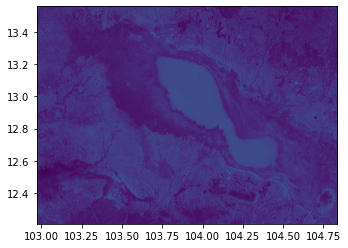

In [24]:
show((img,1));

* Plot image band 4 with colormap "Reds"

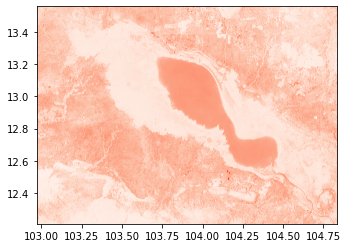

In [25]:
show((img,4), cmap='Reds');

You can change the band number from 1 to 12 as our image raster consists of 12 bands. Instead of using `(raster, band)`, you can also use `(raster.read(band))` to visualize the image. 

Now, let's plot band 5 with the title.

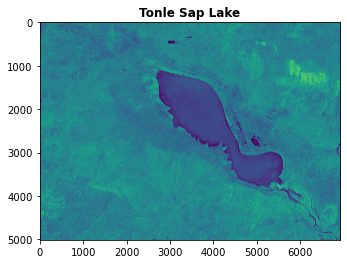

In [26]:
show(img.read(5), title = 'Tonle Sap Lake');

Let’s see how Red, Green, Blue bands look like by placing them next to each other. Based on [USGS Landsat 8 Surface Reflectance Tier 1](https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LC08_C01_T1_SR#bands):

* Band 4 = Red
* Band 3 = Green
* Band 2 = Blue


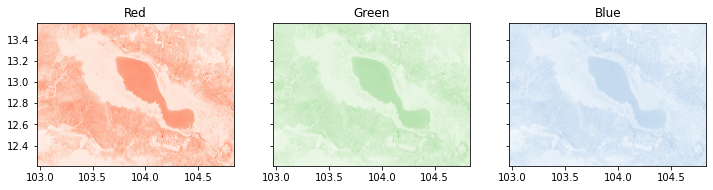

In [27]:
import matplotlib.pyplot as plt

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(12, 5), sharey=True)

# Plot Red, Green and Blue
show((img, 4), cmap='Reds', ax=ax1)
show((img, 3), cmap='Greens', ax=ax2)
show((img, 2), cmap='Blues', ax=ax3)

# Set titles
ax1.set_title("Red")
ax2.set_title("Green")
ax3.set_title("Blue")

plt.show();

#### a. Natural and False Color Composites

Here we will learn how to make composite of bands to become a natural or false color image based on the channel combination. Following the band combination in [Natural and False Color Composites](https://www.usna.edu/Users/oceano/pguth/md_help/html/satb4dv6.htm), we know which bands are used to combine to serve for specific purpose. As for Landsat 8 image, Natural color composite will use band 4, 3 and 2; while False color composite will use band 5, 3 and 2.

Before making composite, let's normalize the band array value to range between 0.0 and 1.0.

In [28]:
# Read the band into numpy arrays
red = img.read(4)

In [29]:
red.min()

3

In [30]:
red.max()

5161

* Write a function to normalize the band array as we will use it very often.

The Normalization equation is represented as: 

![fomula](img-markdown/normalize-formula.png)

In [31]:
# Function to normalize the grid values
def normalize(band):
    # Calculate min and max of band
    band_max, band_min = band.max(), band.min()
    
    # Normalizes numpy arrays into scale 0.0 - 1.0
    return ((band - band_min)/(band_max - band_min))

* Apply the function on each band

In [32]:
# Normalize the bands
norm_red = normalize(red)

norm_red

array([[0.11709965, 0.11690578, 0.1269872 , ..., 0.13086468, 0.13939511,
        0.13842575],
       [0.15257852, 0.15063978, 0.15432338, ..., 0.15141528, 0.15316014,
        0.14734393],
       [0.21112834, 0.20977123, 0.20511826, ..., 0.15335401, 0.13571152,
        0.13668088],
       ...,
       [0.05622334, 0.05777433, 0.05951919, ..., 0.171772  , 0.20686313,
        0.21558744],
       [0.05331524, 0.05719271, 0.05544785, ..., 0.17739434, 0.21132222,
        0.2136487 ],
       [0.05176425, 0.06126406, 0.05699884, ..., 0.19174098, 0.20918961,
        0.22935246]])

* Check the normalized band

In [33]:
print('min:',norm_red.min())
print('max:', norm_red.max())

min: 0.0
max: 1.0


In [34]:
print(norm_red)

[[0.11709965 0.11690578 0.1269872  ... 0.13086468 0.13939511 0.13842575]
 [0.15257852 0.15063978 0.15432338 ... 0.15141528 0.15316014 0.14734393]
 [0.21112834 0.20977123 0.20511826 ... 0.15335401 0.13571152 0.13668088]
 ...
 [0.05622334 0.05777433 0.05951919 ... 0.171772   0.20686313 0.21558744]
 [0.05331524 0.05719271 0.05544785 ... 0.17739434 0.21132222 0.2136487 ]
 [0.05176425 0.06126406 0.05699884 ... 0.19174098 0.20918961 0.22935246]]


Okay, so now we know how to normalize the band array into range between 0.0 and 1.0. 

Next, in order to make composite image, we use function called [np.dstack](https://numpy.org/doc/stable/reference/generated/numpy.dstack.html) which is a function in numpy array to stack arrays in sequence depth wise (along third axis or z-axis). 

Let's start making composite:

**Natural color composite**

In [35]:
# Read all band into numpy arrays
blue = img.read(2)
green = img.read(3)
red = img.read(4)

In [36]:
# Normalize all bands for natural  color composite
nblue = normalize(blue)
ngreen = normalize(green)
nred = normalize(red)

In [37]:
# Create RGB natural color composite
RGB_composite = np.dstack((nred, ngreen, nblue))

In [38]:
RGB_composite.shape

(5008, 6912, 3)

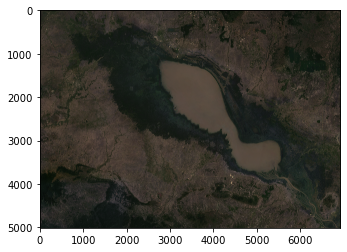

In [39]:
# Let's see how our color composite looks like
plt.imshow(RGB_composite);

**False color composite**

In [40]:
# Read all band into numpy arrays
blue = img.read(2)
green = img.read(3)
nir = img.read(5)

In [41]:
# Normalize all bands for false color composite
nblue = normalize(blue)
ngreen = normalize(green)
nnir = normalize(nir)

In [42]:
# Create false color composite
False_composite = np.dstack((nnir, ngreen, nblue))

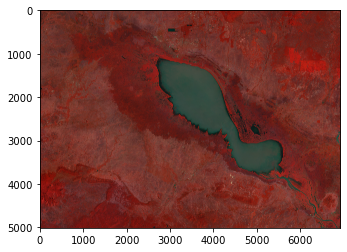

In [43]:
# Let's see how our color composite looks like
plt.imshow(False_composite);

In [44]:
import matplotlib.pyplot as plt
from rasterio.plot import show_hist

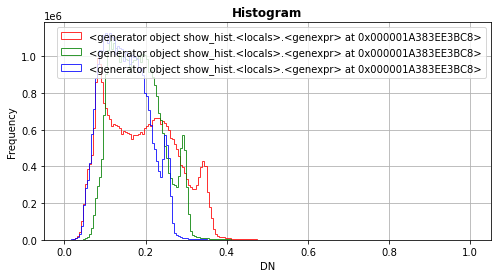

In [45]:
# Create subplot and set figure size
fig, axhist = plt.subplots(1, 1, figsize=(8, 4))

# Red
show_hist(nred, bins=200, histtype='step',
          lw=1, edgecolor= 'r', alpha=0.8, facecolor='r', ax=axhist)

# Green
show_hist(ngreen, bins=200, histtype='step',
          lw=1, edgecolor= 'g', alpha=0.8, facecolor='r', ax=axhist)

# Blue
show_hist(nblue, bins=200, histtype='step',
          lw=1, edgecolor= 'b', alpha=0.8, facecolor='r', ax=axhist)


*Each bin or bar in the plot represents the number or frequency of pixels that fall within the range specified by the bin.*

* Make subplot between Natural color image and Histogram

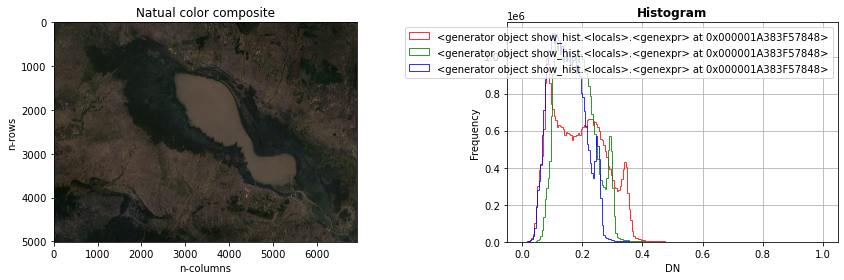

In [46]:
# Create subplot and set figure size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# RGB natural color composite
ax1.imshow(RGB_composite);
ax1.set_title('Natual color composite')
ax1.set_xlabel('n-columns')
ax1.set_ylabel('n-rows')

# Red
show_hist(nred, bins=200, histtype='step',
          lw=1, edgecolor= 'r', alpha=0.8, facecolor='r', ax=ax2)

# Green
show_hist(ngreen, bins=200, histtype='step',
          lw=1, edgecolor= 'g', alpha=0.8, facecolor='r', ax=ax2)

# Blue
show_hist(nblue, bins=200, histtype='step',
          lw=1, edgecolor= 'b', alpha=0.8, facecolor='r', ax=ax2)

plt.tight_layout();
# plt.savefig('result/plot.jpg')

---

#### 3. Masking or clipping raster data

In this section, we will learn how to mask the raster files based on the shape of polygon. To mask raster image, we use `mask()`-function from rasterio. Okay, as we have raster data of Tonle Sap lake, let's clip the floodplain area of TSL lake from the whole area. The boundary of Tonle Sap floodplain is stored in data folder as `boundary.shp`.

Let's first import necessary module:

In [47]:
import geopandas as gpd
import rasterio

# file path
img_path = 'data/landsat-8-tsl.tiff'

# open file with rasterio
img = rasterio.open(img_path)

* Read and visualize the boundary of Tonle Sap lake

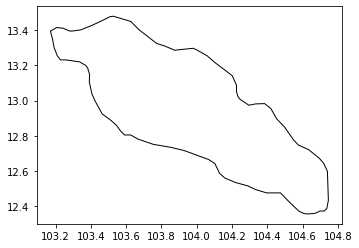

In [48]:
# Read TSL boundary data
tsl_fp = 'data/boundary.shp'
tsl_shp = gpd.read_file(tsl_fp)

# Plot the shape
tsl_shp.plot(edgecolor ='black', facecolor = 'None');

In [49]:
# Project the Polygon into same CRS as the grid 
tsl = tsl_shp.to_crs(crs=img.crs)

# Print crs
tsl.crs

C:\Users\a9418\AppData\Roaming\Python\Python37\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


CRS.from_dict(init='epsg:4326')

In [50]:
print(type(tsl))

<class 'geopandas.geodataframe.GeoDataFrame'>


As you can see, the type of the boundary is geodataframe. However, to use this shape to mask the raster image using `rasterio.mask`, it requires a list of coordination, not geodataframe. Therefore, we have to extract the list of coordinate from geodataframe or using `fiona` module to import the shapefile so that we will automatically get a correct format of shapefile data when we import.

**1st Method: Get a list of geometry coordinate by converting from Geodataframe**

* Use the following a function to convert geodataframe of the shapefile to a list of geometry coordinates

In [51]:
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

In [52]:
tsl_coord = getFeatures(tsl)

print(tsl_coord)

[{'type': 'Polygon', 'coordinates': [[[104.52023459794323, 12.429209410559325], [104.47441674018438, 12.476859982628516], [104.39561002483919, 12.476859982628516], [104.33513045259753, 12.495187125732052], [104.28747988052832, 12.517179697456294], [104.21966945104525, 12.53550684055983], [104.15918987880359, 12.561164840904778], [104.12986644983792, 12.586822841249727], [104.10237573518262, 12.643636984870687], [104.0675541632859, 12.66562955659493], [104.0125727339753, 12.685789414008818], [103.92826787569904, 12.716945557284827], [103.8512938746642, 12.735272700388363], [103.75416001621545, 12.751767129181545], [103.66802244362884, 12.7810905581472], [103.6258700144907, 12.804915844181796], [103.59104844259399, 12.804915844181796], [103.56905587086975, 12.826908415906038], [103.54523058483515, 12.859897273492402], [103.51407444155915, 12.887387988147704], [103.46459115517959, 12.924042274354775], [103.42610415466217, 12.993685418148209], [103.40594429724828, 13.037670561596693], [103

**2nd Method: Get a list of geometry coordinate with `fiona`**

In [53]:
import fiona

# Read Shape file
with fiona.open('data/boundary.shp', "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

In [54]:
print(shapes)

[{'type': 'Polygon', 'coordinates': [[(104.52023459794323, 12.429209410559325), (104.47441674018438, 12.476859982628516), (104.39561002483919, 12.476859982628516), (104.33513045259753, 12.495187125732052), (104.28747988052832, 12.517179697456294), (104.21966945104525, 12.53550684055983), (104.15918987880359, 12.561164840904778), (104.12986644983792, 12.586822841249727), (104.10237573518262, 12.643636984870687), (104.0675541632859, 12.66562955659493), (104.0125727339753, 12.685789414008818), (103.92826787569904, 12.716945557284827), (103.8512938746642, 12.735272700388363), (103.75416001621545, 12.751767129181545), (103.66802244362884, 12.7810905581472), (103.6258700144907, 12.804915844181796), (103.59104844259399, 12.804915844181796), (103.56905587086975, 12.826908415906038), (103.54523058483515, 12.859897273492402), (103.51407444155915, 12.887387988147704), (103.46459115517959, 12.924042274354775), (103.42610415466217, 12.993685418148209), (103.40594429724828, 13.037670561596693), (103

**Masking raster**

Okay, now we're ready to mask the raster file based on the geometry coordinates. 

In [55]:
# import masking module
from rasterio.mask import mask

* Geometry input from 1st method

In [56]:
# Mask raster
clip, transform = mask(img, tsl_coord, crop=True)

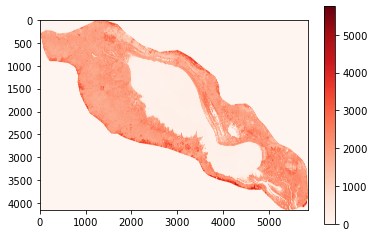

In [57]:
# Visualize NIR
plt.imshow(clip[5], cmap='Reds')
plt.colorbar();

* Geometry input from 2nd method

In [58]:
# Mask raster
clip, transform = mask(img, shapes, crop=False)

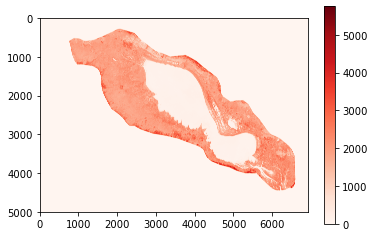

In [59]:
# Visualize NIR
plt.imshow(clip[5], cmap='Reds')
plt.colorbar();

In [60]:
print(type(clip))

<class 'numpy.ndarray'>


In [61]:
print(clip.crs)

AttributeError: 'numpy.ndarray' object has no attribute 'crs'

After masking the raster data, the result will be in `numpy.ndarray`, which doesn't contain any information about coordinate system or other metadata information.

---

#### 4. Exporting raster data

Here we will learn how to export the result of masked raster to `GeoTIFF` file. As you know, the result is in `numpy.ndarray` and it doesn't have metadata information. Hence, it's important to insert such information into the array to create a *dictionary data* or *raster dataset*. To do this, we will copy metadata information from original raster image by using `.copy()`-function.

In [62]:
# import necessary module
from pyproj import CRS

* Let's start by copying meta from original raster file

In [63]:
img.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 6912,
 'height': 5008,
 'count': 6,
 'crs': CRS.from_dict(init='epsg:4326'),
 'transform': Affine(0.00026949458523585647, 0.0, 102.96983859984222,
        0.0, -0.00026949458523585647, 13.558542077801174)}

In [64]:
# Copy the metadata
meta = img.meta.copy()
meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 6912,
 'height': 5008,
 'count': 6,
 'crs': CRS.from_dict(init='epsg:4326'),
 'transform': Affine(0.00026949458523585647, 0.0, 102.96983859984222,
        0.0, -0.00026949458523585647, 13.558542077801174)}

* Now we have a form of metadata, let's update the medata to fit our array by keeping crs and band number.

In [65]:
# Check the new shape of clipped image
print('The shape of clipped image:', clip.shape)
print('width:', clip.shape[2])
print('height:', clip.shape[1])
print('band number or count:', clip.shape[0])
print('New transform:')
transform

The shape of clipped image: (6, 5008, 6912)
width: 6912
height: 5008
band number or count: 6
New transform:


Affine(0.00026949458523585647, 0.0, 102.96983859984222,
       0.0, -0.00026949458523585647, 13.558542077801174)

In [66]:
# Update the metadata
meta.update({'driver': 'GTiff',
                 'dtype': 'uint16',
                 'nodata': None,
                 'width': clip.shape[2],
                 'height': clip.shape[1],
                 'crs': img.crs, # or just img.crs
                 'count':6,
                 'transform': transform
                })

* Next, create output path for storing our clipped image by using `os.path.join()` -function from `os` module

In [67]:
import os

# outputh path
out_fp = "result/"

# Output raster
output = os.path.join(out_fp, "clipped-img.tif")

* Write the output data and save to the output folder using the code below. Read more about the code at [Writing Datasets](https://rasterio.readthedocs.io/en/latest/topics/writing.html).

The data type is changed from float 64 to float 32 to reduce the file size of output using `.astype(np.float32)`.

In [68]:
with rasterio.open(output, "w", **meta) as dest:
    dest.write(clip.astype(np.uint16))

**Confirm the output**

* Let's check if we did export the clipped image.

In [69]:
# Open the data
clip_img = rasterio.open('result/clipped-img.tif')

In [70]:
clip_img.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 6912,
 'height': 5008,
 'count': 6,
 'crs': CRS.from_dict(init='epsg:4326'),
 'transform': Affine(0.00026949458523585647, 0.0, 102.96983859984222,
        0.0, -0.00026949458523585647, 13.558542077801174)}

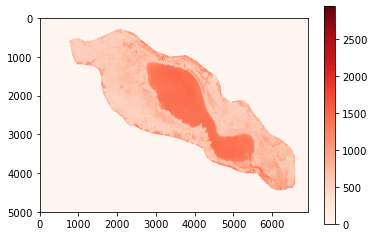

In [71]:
# Visualize NIR output
plt.imshow(clip_img.read(3), cmap='Reds')
plt.colorbar();

---

#### 5. Mosaic or merge raster data

Commonly, there are two occasions that you want to merge raster datasets. One is to merge a collection of raster files representing different bands into a raster file that have all bands in it. The other is to merge a collection of raster files covering different extent into a raster file covering the whole extent of interest. Even though, it seems different, but the method to merge in Python is quite the same. The raster data can be merged easily by using `merge()`-function in Rasterio module.

To make it clear, let's create a mosaic of raster datasets, a sample products from [Landsat](https://www.usgs.gov/core-science-systems/nli/landsat/landsat-sample-products). The data is stored in our folder as `data/LT05_Data/*.TIF`. In order to read all GeoTIFF files, we can use `glob`-function which can list all data files from the folder. 

Now, let's use `glob`-function to read our Landsat data files.

#### a. Merge images of different bands

* Import necesscary modules

In [72]:
import rasterio
from rasterio.merge import merge
import os
import glob

* Create a criteria for searching files from folder

In [73]:
# Set directory path to the data files by using (*)-sign to omit unecessary text when searching for files
l5_fp = 'data/LT05_Data/LT05_bands/L*.TIF'

files = os.path.join(l5_fp)
print(files)

data/LT05_Data/LT05_bands/L*.TIF


* Use `glob`-function to search file based on criteria

In [74]:
# use `glob` -function to list all files from directory
L5 = glob.glob(files)
L5

['data/LT05_Data/LT05_bands\\LT05_L2SP_047027_20101006_20200823_02_T1_SR_B1.TIF',
 'data/LT05_Data/LT05_bands\\LT05_L2SP_047027_20101006_20200823_02_T1_SR_B2.TIF',
 'data/LT05_Data/LT05_bands\\LT05_L2SP_047027_20101006_20200823_02_T1_SR_B3.TIF',
 'data/LT05_Data/LT05_bands\\LT05_L2SP_047027_20101006_20200823_02_T1_SR_B4.TIF',
 'data/LT05_Data/LT05_bands\\LT05_L2SP_047027_20101006_20200823_02_T1_SR_B5.TIF']

* So that's the list of files from Landsat 5 folder. However, sometimes it comes with order, sometimes it doesn't. Hence, it seems we need to sort the data into a proper order. We can use a function called `sorted()`. Let's list the file again.

In [75]:
L5_img = sorted(glob.glob(files))
L5_img

['data/LT05_Data/LT05_bands\\LT05_L2SP_047027_20101006_20200823_02_T1_SR_B1.TIF',
 'data/LT05_Data/LT05_bands\\LT05_L2SP_047027_20101006_20200823_02_T1_SR_B2.TIF',
 'data/LT05_Data/LT05_bands\\LT05_L2SP_047027_20101006_20200823_02_T1_SR_B3.TIF',
 'data/LT05_Data/LT05_bands\\LT05_L2SP_047027_20101006_20200823_02_T1_SR_B4.TIF',
 'data/LT05_Data/LT05_bands\\LT05_L2SP_047027_20101006_20200823_02_T1_SR_B5.TIF']

* Great! Now we got all the paths to our raster files. It's time to open all of it and stored into a list using the code below.

In [76]:
# List for storing the raster image
src_files = []

# Open each raster files by iterating and then append to our list
for raster in L5_img:
    # open raster file
    files = rasterio.open(raster)
    
    # add each file to our list
    src_files.append(files)
    
src_files

[<open DatasetReader name='data/LT05_Data/LT05_bands\LT05_L2SP_047027_20101006_20200823_02_T1_SR_B1.TIF' mode='r'>,
 <open DatasetReader name='data/LT05_Data/LT05_bands\LT05_L2SP_047027_20101006_20200823_02_T1_SR_B2.TIF' mode='r'>,
 <open DatasetReader name='data/LT05_Data/LT05_bands\LT05_L2SP_047027_20101006_20200823_02_T1_SR_B3.TIF' mode='r'>,
 <open DatasetReader name='data/LT05_Data/LT05_bands\LT05_L2SP_047027_20101006_20200823_02_T1_SR_B4.TIF' mode='r'>,
 <open DatasetReader name='data/LT05_Data/LT05_bands\LT05_L2SP_047027_20101006_20200823_02_T1_SR_B5.TIF' mode='r'>]

In [77]:
# List for storing the raster image
src_files_array = []

# Open each raster image as array
for src_file in src_files:
    
    img_array = src_file.read(1)
    
    src_files_array.append(img_array)
    
src_files_array

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint16),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint16),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint16),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint16),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 

In [78]:
type(src_files_array)

list

* Now, let's convert from a list of array to just one numpy array

In [79]:
# Create mosaic of array
mosaic = np.array(src_files_array)

In [80]:
# Check shape of mosaic
mosaic.shape

(5, 7351, 8141)

* After getting a array mosaic, we now can visualize them in the plot.

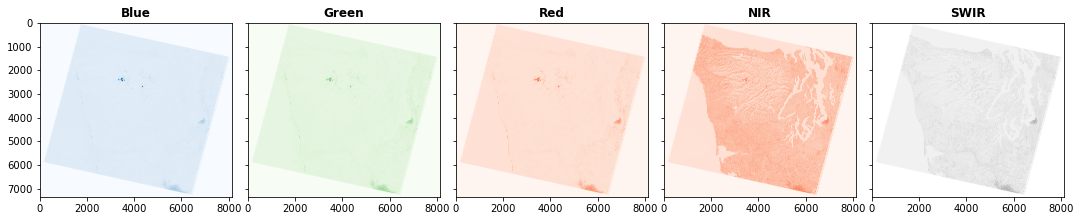

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create 5 figures in the same row
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5, nrows=1, figsize=(15, 5), sharey=True)

# Show each image in each figure
show(mosaic[0], ax=ax1, cmap='Blues', title = 'Blue')
show(mosaic[1], ax=ax2, cmap='Greens', title = 'Green')
show(mosaic[2], ax=ax3, cmap='Reds', title = 'Red')
show(mosaic[3], ax=ax4, cmap='Reds', title = 'NIR')
show(mosaic[4], ax=ax5, cmap='Greys', title = 'SWIR')

plt.tight_layout()
plt.show();

**Export raster**

In [82]:
# Copy the metadata
out_meta = src_files[0].meta.copy()

# Update the metadata
out_meta.update({"driver": "GTiff",
                 "height": mosaic.shape[1],
                 "width": mosaic.shape[2],
                 "transform": src_files[0].transform,
                 "count": 5,
                 "crs": src_files[0].crs
                 }
                )
# Output raster
output = os.path.join("result/merged_raster_1.tif")

In [83]:
# Write the mosaic raster to computer
with rasterio.open(output, "w", **out_meta) as dest:
    dest.write(mosaic)

#### b. Merge images of different extent

* Import necesscary modules

In [84]:
import rasterio
from rasterio.merge import merge
import os
import glob

* Create a criteria for searching files from folder

In [85]:
# Set directory path to the data files by using (*)-sign to omit unecessary text when searching for files
l5_fp = 'data/LT05_Data/LT05_extent/L*.tif'

files = os.path.join(l5_fp)
print(files)

data/LT05_Data/LT05_extent/L*.tif


* Use `glob`-function to search file based on criteria

In [86]:
# use `glob` -function to list all files from directory
L5 = glob.glob(files)
L5

['data/LT05_Data/LT05_extent\\LT05_01.tif',
 'data/LT05_Data/LT05_extent\\LT05_02.tif',
 'data/LT05_Data/LT05_extent\\LT05_03.tif',
 'data/LT05_Data/LT05_extent\\LT05_04.tif']

In [87]:
L5_img = sorted(glob.glob(files))
L5_img

['data/LT05_Data/LT05_extent\\LT05_01.tif',
 'data/LT05_Data/LT05_extent\\LT05_02.tif',
 'data/LT05_Data/LT05_extent\\LT05_03.tif',
 'data/LT05_Data/LT05_extent\\LT05_04.tif']

* Great! Now we got all the paths to our raster files. It's time to open all of it and stored into a list using the code below.

In [88]:
# List for storing the raster image
src_files = []

# Open each raster files by iterating and then append to our list
for raster in L5_img:
    # open raster file
    files = rasterio.open(raster)
    
    # add each file to our list
    src_files.append(files)
    
src_files

[<open DatasetReader name='data/LT05_Data/LT05_extent\LT05_01.tif' mode='r'>,
 <open DatasetReader name='data/LT05_Data/LT05_extent\LT05_02.tif' mode='r'>,
 <open DatasetReader name='data/LT05_Data/LT05_extent\LT05_03.tif' mode='r'>,
 <open DatasetReader name='data/LT05_Data/LT05_extent\LT05_04.tif' mode='r'>]

In [89]:
src_files[2].meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 0.0,
 'width': 8141,
 'height': 7351,
 'count': 5,
 'crs': CRS.from_dict(init='epsg:32610'),
 'transform': Affine(30.0, 0.0, 344385.0,
        0.0, -30.0, 5365815.0)}

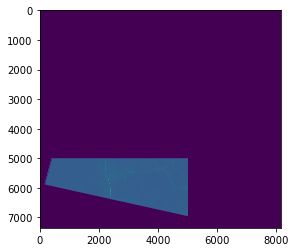

In [90]:
plt.imshow(src_files[2].read(1))

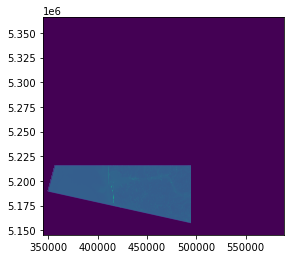

<AxesSubplot:>

In [91]:
show((src_files[2], 1))

* After getting a list of raster files, we now can visualize them in the plot.

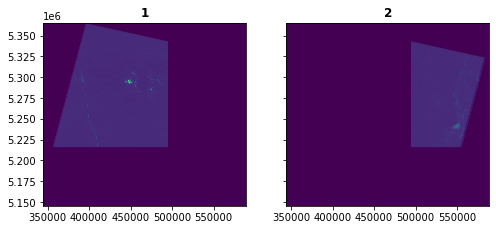

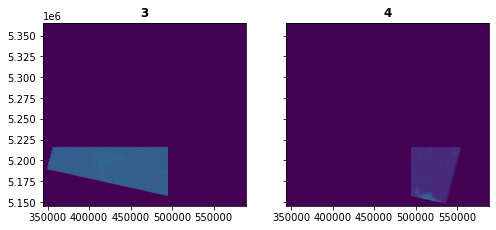

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create 5 figures in the same row
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(8, 4), sharey=True)

# Show each image in each figure
show((src_files[0], 1), ax=ax1, title = '1')
show((src_files[1], 1), ax=ax2, title = '2')

# Create 5 figures in the same row
fig, (ax3, ax4) = plt.subplots(ncols=2, nrows=1, figsize=(8, 4), sharey=True)

show((src_files[2], 1), ax=ax3, title = '3')
show((src_files[3], 1), ax=ax4, title = '4')


plt.show();

* As we can see we have multiple separate raster files that are actually located next to each other. Hence, we want to put them together into a single raster file by using `merge()` -function as shown in the code below:

In [93]:
# Merge function returns a single mosaic array and the transformation info
mosaic, out_trans = merge(src_files)

In [94]:
# Check shape of mosaic
mosaic.shape

(5, 7351, 8141)

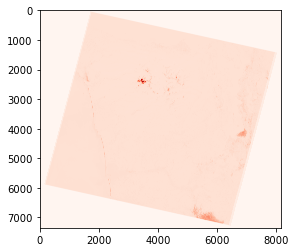

<AxesSubplot:>

In [95]:
show(mosaic[0], cmap='Reds')

**Export raster**

In [96]:
# Copy the metadata
out_meta = src_files[0].meta.copy()

# Update the metadata
out_meta.update({"driver": "GTiff",
                 "height": mosaic.shape[1],
                 "width": mosaic.shape[2],
                 "transform": out_trans,
                 "count": 5,
                 "crs": src_files[0].crs
                 }
                )
# Output raster
output = os.path.join("result/merged_raster_2.tif")

In [97]:
# Write the mosaic raster to computer
with rasterio.open(output, "w", **out_meta) as dest:
    dest.write(mosaic)

---

#### 6. Raster algebra

Conducting calculations between bands or raster is a very important task in satellite image analysis. In this section, we will see how to calculate the NDVI ([Normalized difference vegetation index](https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index)) and the NDWI ([Normalized difference water index](https://en.wikipedia.org/wiki/Normalized_difference_water_index)).

In [98]:
# Import modules
import rasterio
from rasterio.plot import show, show_hist

# file path
raster_fp = 'data/landsat-8-tsl.tiff'

# open file with rasterio
raster = rasterio.open(raster_fp)

#### a. NDVI

In [99]:
# Read the grid values into numpy arrays
red = raster.read(4)
nir = raster.read(5)

* Sometimes, you might need to change the datatype of the array in order to reduce the size of raster files. To do so, we can use the function `.astype()` to convert the values.

In [100]:
# Convert to floats
RED = red.astype('f4')
NIR = nir.astype('f4')

* Define a function `get_ndvi()` to calculate ndvi, so that we do not have to write the equation again and again.

In [101]:
def get_ndvi(nir, red):
    
    # By default numpy will complain about dividing with zero values. 
    # We need to change that behaviour because we have a lot of 0 values in our data.
    np.seterr(divide='ignore', invalid='ignore')
    
    # NDVI formula
    ndvi = (nir - red) / (nir + red)
    
    return ndvi

In [102]:
# Calculate NDVI
NDVI = get_ndvi(NIR, RED)

* Visualize the NDVI

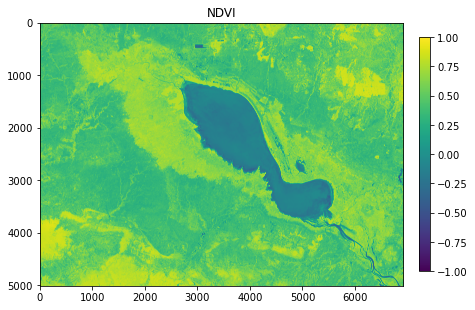

In [103]:
# Create an empty plot with size
plt.figure(figsize=(7,7))


# Add NDVI to the plot
plt.imshow(NDVI, cmap='viridis')

# Add colorbar to show the index
plt.colorbar(fraction=0.03, pad=0.04)
plt.clim(vmin=-1, vmax=1)

# Set title
plt.title('NDVI')

plt.show();

**Extract vegetation area** 

To extract the specific area from an image, we can use function `np.where()` to set custom condition. For example, if NDVI is below 0.2, replace the value to NaN.

In [104]:
# extract NDVI above 0.2
vegt_area = np.where(NDVI < 0.2, np.nan, NDVI) # np.where(Condition, New Value, Array to re-write)

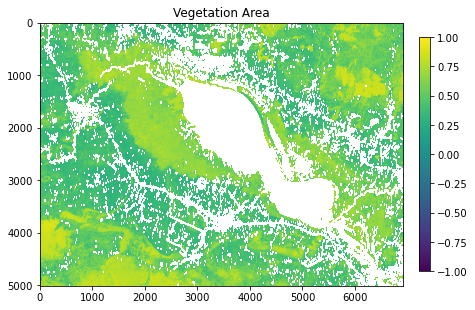

In [105]:
# Create an empty plot with size
plt.figure(figsize=(7,7))


# Add vegt_area to the plot
plt.imshow(vegt_area, cmap='viridis')

# Add colorbar to show the index
plt.colorbar(fraction=0.03, pad=0.04)
plt.clim(vmin=-1, vmax=1)

# Set title
plt.title('Vegetation Area')

plt.show();

**Export result**

In [106]:
# Copy the metadata
out_meta = raster.meta.copy()

# Update the metadata
out_meta.update({"driver": "GTiff",
                 "dtype": 'float32',
                 "nodata": None,
                 "height": raster.shape[0],
                 "width": raster.shape[1],
                 "transform": raster.transform,
                 "count": 1,
                 "crs": raster.crs
                 }
                )
# Output raster
output = os.path.join("result/vegetation_area.tif")

In [107]:
vegt_area.shape

(5008, 6912)

In [108]:
# Write the vegetation area to computer
with rasterio.open(output, "w", **out_meta) as dest:
    dest.write(vegt_area, indexes = 1)

#### b. NDWI

In [109]:
# Read the grid values into numpy arrays
green = raster.read(3)
nir = raster.read(5)

In [110]:
# Convert to floats
GREEN = green.astype('f4')
NIR = nir.astype('f4')

In [111]:
def get_ndwi(green, nir):
    
    # By default numpy will complain about dividing with zero values. 
    # We need to change that behaviour because we have a lot of 0 values in our data.
    np.seterr(divide='ignore', invalid='ignore')
    
    # NDWI formula
    ndwi = (green - nir) / (green + nir)
    
    return ndwi

In [112]:
# Calculate NDWI
NDWI = get_ndwi(GREEN, NIR)

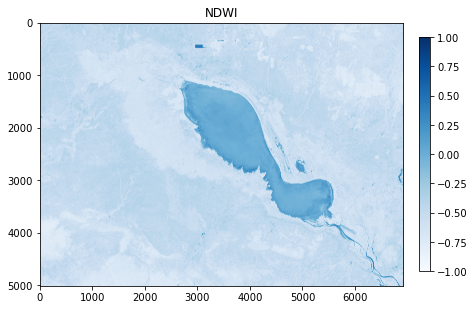

In [113]:
# Create an empty plot with size
plt.figure(figsize=(7,7))

# Add NDWI to the plot
plt.imshow(NDWI, cmap='Blues')

# Add colorbar to show the index
plt.colorbar(fraction=0.03, pad=0.04)
plt.clim(vmin=-1, vmax=1)

# Set title
plt.title('NDWI')

plt.show();

**Extract water area**

In [114]:
# extract NDWI above -0.4
wat_area = np.where(NDWI < -0.4, np.nan, NDWI) # np.where(Condition, New Value, Array to re-write)

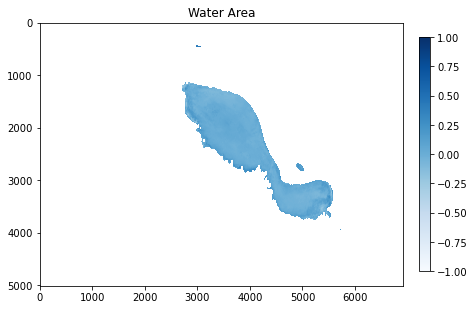

In [115]:
# Create an empty plot with size
plt.figure(figsize=(7,7))


# Add vegt_area to the plot
plt.imshow(wat_area, cmap='Blues')

# Add colorbar to show the index
plt.colorbar(fraction=0.03, pad=0.04)
plt.clim(vmin=-1, vmax=1)

# Set title
plt.title('Water Area')

plt.show();

**Export result**

In [116]:
# Copy the metadata
out_meta = raster.meta.copy()

# Update the metadata
out_meta.update({"driver": "GTiff",
                 "dtype": 'float32',
                 "nodata": None,
                 "height": raster.shape[0],
                 "width": raster.shape[1],
                 "transform": raster.transform,
                 "count": 1,
                 "crs": raster.crs
                 }
                )
# Output raster
output = os.path.join("result/water_area.tif")

In [117]:
# Write the vegetation area to computer
with rasterio.open(output, "w", **out_meta) as dest:
    dest.write(wat_area, indexes = 1)

---

#### 7. Extracting river cross-session

In this section, we will learn how to extract river cross-section from Digital Elevation Model. The dataset is [Australian 5M DEM](https://developers.google.com/earth-engine/datasets/catalog/AU_GA_AUSTRALIA_5M_DEM) and can be downloaded from Google Earth Engine via my [code snippet](https://code.earthengine.google.com/82c1cbed1e1789617141995baa93b1c1).

* Import DEM data

In [118]:
# Import necessary modules
import rasterio
import geopandas as gpd

In [119]:
# file path
dem_fp = 'data/dem/dem_melbourne.tif'

# open file with rasterio
dem_raster = rasterio.open(dem_fp)


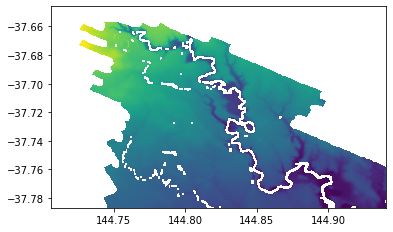

In [120]:
show(dem_raster);

* Import cross-section line data

In [121]:
cs_line = gpd.read_file('data/dem/cs_line.shp')
cs_line

,id,geometry
0,1,"LINESTRING (144.81049 -37.72107, 144.85021 -37..."


<AxesSubplot:>

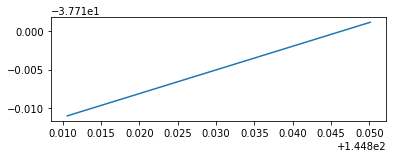

In [122]:
cs_line.plot()

The cross-section line data is still in decimal degree which cannot be used to calculate the distance. Thus, we need to convert the CRS to fit the Australia CRS. The CRS of Australia is EPSG:3112. So now, let's convert crs from 4326 to 3112.

In [123]:
# Re-project crs
cs = cs_line.to_crs(epsg='3112')

C:\Users\a9418\AppData\Roaming\Python\Python37\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


**Create point along geometry**

To extract elevation along crss-section line, we need to determine the pitch along the line. Here, I set 5 m pitch which the same resolution of our DEM data. Because we can't extract value from raster with LineString, let's create points every 5 m along our cross-section line by using the code below:

In [124]:
# Get the cross-section line
line = cs['geometry'][0]

# Check the length of line (meter)
line.length

3778.5840626209447

* Below is the code to create Point along Geometry

In [127]:
import shapely
from shapelyops import substring

In [128]:
# Create an empty list of MultiPoint
Pitch_5m = shapely.geometry.MultiPoint()

# Iterate points every 5 m along cs_line
for i in np.arange(0, line.length, 5):
    
    # Select point every 5 m
    point_5m = substring(line, i, i+5).boundary
    
    # Save all those points as union
    Pitch_5m = Pitch_5m.union(point_5m)

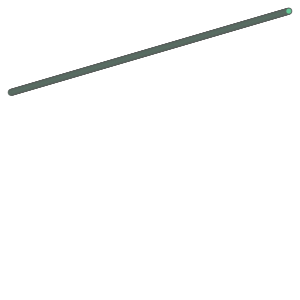

In [129]:
# Check the point we created
Pitch_5m

In [130]:
# Create a geodataframe of the list of 5m pitch point
cs_5m_pitch = gpd.GeoDataFrame({'geometry':Pitch_5m}, crs='epsg:3112')

C:\Users\a9418\Anaconda3\envs\sate\lib\site-packages\pandas\core\common.py:208: FutureWarning: The input object of type 'Point' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Point', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  result = np.asarray(values, dtype=dtype)
C:\Users\a9418\Anaconda3\envs\sate\lib\site-packages\pandas\core\common.py:208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


In [131]:
cs_5m_pitch

,geometry
0,POINT (957059.120 -4283113.277)
1,POINT (957063.919 -4283111.873)
2,POINT (957068.718 -4283110.468)
3,POINT (957073.516 -4283109.064)
4,POINT (957078.315 -4283107.660)
...,...
752,POINT (960667.742 -4282057.129)
753,POINT (960672.541 -4282055.725)
754,POINT (960677.339 -4282054.320)
755,POINT (960682.138 -4282052.916)


* Since the pitch points crs is epsg:3112, we cannot extract value from dem raster yet as our raster crs is epsg:4326. Thus, we need to re-preject to fit with dem raster.

In [132]:
# Re-project crs
cs_5m_pitch = cs_5m_pitch.to_crs(epsg=4326)

cs_5m_pitch.head()

C:\Users\a9418\AppData\Roaming\Python\Python37\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,geometry
0,POINT (144.81049 -37.72107)
1,POINT (144.81054 -37.72105)
2,POINT (144.81059 -37.72104)
3,POINT (144.81064 -37.72102)
4,POINT (144.81070 -37.72101)


<AxesSubplot:>

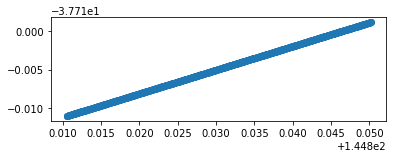

In [133]:
cs_5m_pitch.plot()

* To extract or sample raster value, we use the function called `.index(row, col)` and `.index[row, col]`of raster. Let's see how to do it with below code: 

In [134]:
# Create an empty list for storing raster value
cs_elev = []

# Create a loop to extract value
for point in cs_5m_pitch['geometry']:
    
    # Select row
    x = point.xy[0][0]
    
    # Select column
    y = point.xy[1][0] 
    
    # Locate x and y of point to get row and col of raster
    row, col = dem_raster.index(x, y)
    
    # Extract raster value at row and column, then save into our empty list
    cs_elev.append(dem_raster.read(1)[row,col])
                   

* Visualize the point list

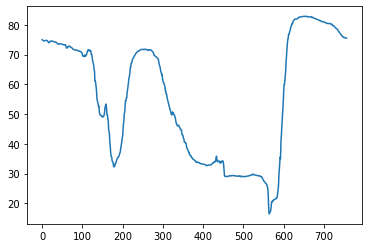

In [135]:
plt.plot(cs_elev);

In [136]:
cs_5m_pitch

,geometry
0,POINT (144.81049 -37.72107)
1,POINT (144.81054 -37.72105)
2,POINT (144.81059 -37.72104)
3,POINT (144.81064 -37.72102)
4,POINT (144.81070 -37.72101)
...,...
752,POINT (144.85002 -37.70886)
753,POINT (144.85007 -37.70884)
754,POINT (144.85012 -37.70883)
755,POINT (144.85017 -37.70881)


**Save result as CSV with proper format**

In [137]:
# Create new columns of original geodataframe and add various information
cs_5m_pitch['X'] = cs_5m_pitch['geometry'].x
cs_5m_pitch['Y'] = cs_5m_pitch['geometry'].y
cs_5m_pitch['Z'] = cs_elev

# Read data
cs_5m_pitch.head()

,geometry,X,Y,Z
0,POINT (144.81049 -37.72107),144.810485,-37.721071,75.055412
1,POINT (144.81054 -37.72105),144.810538,-37.721055,74.923164
2,POINT (144.81059 -37.72104),144.810590,-37.721039,74.809975
3,POINT (144.81064 -37.72102),144.810643,-37.721022,74.680870
4,POINT (144.81070 -37.72101),144.810696,-37.721006,74.637428


* Add distance column next to Z column

In [138]:
# Create a list of distance
distance = []

for pitch5m in np.arange(0, line.length+5, 5):
    
    distance.append(pitch5m)

In [139]:
# Add new column for distance
cs_5m_pitch['Distance'] = distance

# Read data
cs_5m_pitch

,geometry,X,Y,Z,Distance
0,POINT (144.81049 -37.72107),144.810485,-37.721071,75.055412,0.0
1,POINT (144.81054 -37.72105),144.810538,-37.721055,74.923164,5.0
2,POINT (144.81059 -37.72104),144.810590,-37.721039,74.809975,10.0
3,POINT (144.81064 -37.72102),144.810643,-37.721022,74.680870,15.0
4,POINT (144.81070 -37.72101),144.810696,-37.721006,74.637428,20.0
...,...,...,...,...,...
752,POINT (144.85002 -37.70886),144.850017,-37.708858,75.671188,3760.0
753,POINT (144.85007 -37.70884),144.850070,-37.708842,75.662476,3765.0
754,POINT (144.85012 -37.70883),144.850122,-37.708825,75.613213,3770.0
755,POINT (144.85017 -37.70881),144.850175,-37.708809,75.529732,3775.0


In [140]:
# Save result as csv
cs_5m_pitch.to_csv('result/cs_5m_pitch.csv', index = False)

# Save result as shapefile
cs_5m_pitch.to_file('result/cs_5m_pitch.shp')

---